In [5]:
'''
Baseado em exemplos disponíveis em:
https://github.com/keras-team/keras/blob/master/examples/
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set_context('paper')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [8]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [16]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

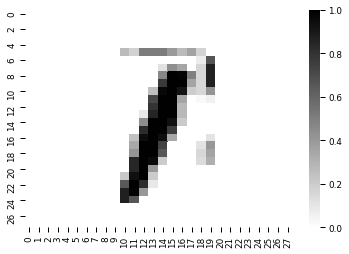

In [37]:
# Plot some numbers
sns.heatmap(x_train[67].reshape(28, 28), cmap = 'gray_r', vmin = 0, vmax = 1)

In [1]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Using TensorFlow backend.


60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [2]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2466 - accuracy: 0.9241 - val_loss: 0.1071 - val_accuracy: 0.9668
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1022 - accuracy: 0.9682 - val_loss: 0.0893 - val_accuracy: 0.9744
Epoch 3/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0762 - accuracy: 0.9774 - val_loss: 0.0754 - val_accuracy: 0.9790
Epoch 4/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0609 - accuracy: 0.9814 - val_loss: 0.0739 - val_accuracy: 0.9784
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0498 - accuracy: 0.9847 - val_loss: 0.0834 - val_accuracy: 0.9763
Epoch 6/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0440 - accuracy: 0.9871 - val_loss: 0.0795 - val_accuracy: 0.9801
Epoch 7/20
60000/60000 [==============================] - 4s 60us/st

In [3]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Fazendo uma predição

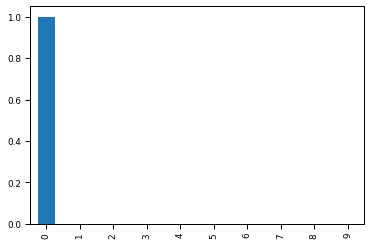

In [45]:
ii_test = 10
pd.Series(model.predict(x_test[ii_test].reshape(1, 784))[0]).plot(kind = 'bar')

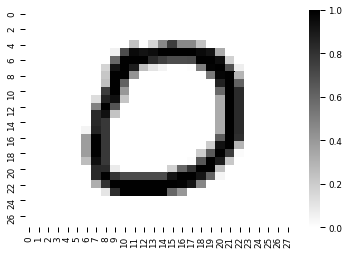

In [46]:
sns.heatmap(x_test[ii_test].reshape(28, 28), cmap = 'gray_r', vmin = 0, vmax = 1)